In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
model = DecisionTreeClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9583333333333334)

In [9]:
from sklearn.model_selection import validation_curve


train_score, val_score = validation_curve(
    model,
    X_train,
    y_train,
    param_name='max_depth',
    param_range=np.arange(1, 20),
    cv=5,
    scoring='accuracy'
)

In [10]:
train_score.shape

(19, 5)

In [11]:
val_score.shape

(19, 5)

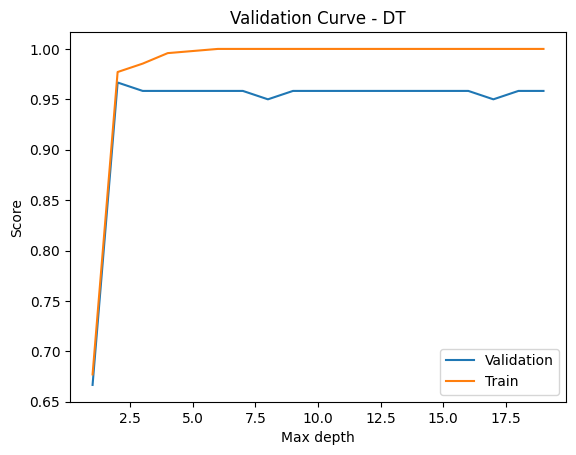

In [13]:
train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
k=np.arange(1, 20)
plt.plot(k, val_mean, label='Validation')
plt.plot(k, train_mean, label='Train')

plt.xlabel('Max depth')
plt.ylabel('Score')
plt.title('Validation Curve - DT')
plt.legend()
plt.grid(False)
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,3,4,5,6],
              'min_samples_split': [2,4,6,10],
              'criterion': ['gini', 'entropy']
             }

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 10]})

In [15]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}


In [16]:
print(grid.best_score_)

0.9666666666666668


In [17]:
model=grid.best_estimator_

In [18]:
model.score(X_test,y_test)

0.9

In [19]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  9]])

In [22]:
from  sklearn.model_selection import learning_curve

In [23]:
N,train_score,val_score = learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)

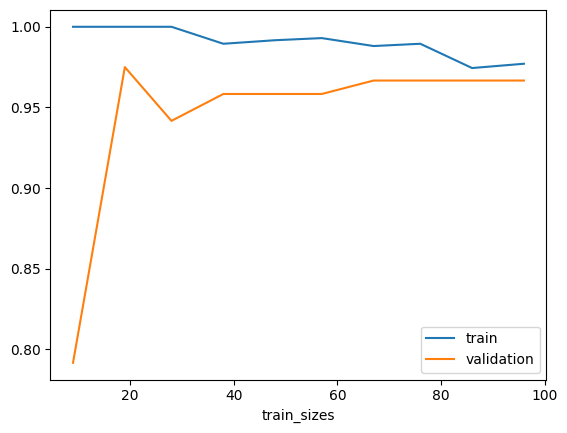

In [24]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()